### OpenCV 对图像的几何变换

---

### 图像缩放

使用方法：

- $cv2.resize(src, dsize[, dst[,fx,[fy[,interpolation]]]])->dst$
- src :  输入需要缩放的图像
- dsize ：目标的图像大小
- dst : 目标图大小、将图片存在一个已有的图像上
- fx, fy ： 缩放系数
- interpolation ： 插值方式

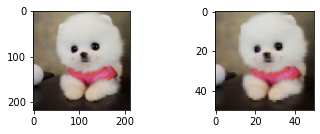

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("./00_img/cv2.png")
new_image = cv2.resize(image, (50, 50))

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.imshow(image[..., ::-1])  # brg 2 rgb
ax2.imshow(new_image[..., ::-1])

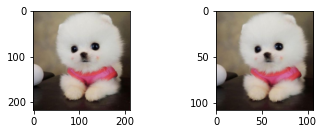

In [5]:
image = cv2.imread("./00_img/cv2.png")
new_image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.imshow(image[..., ::-1])
ax2.imshow(new_image[..., ::-1])

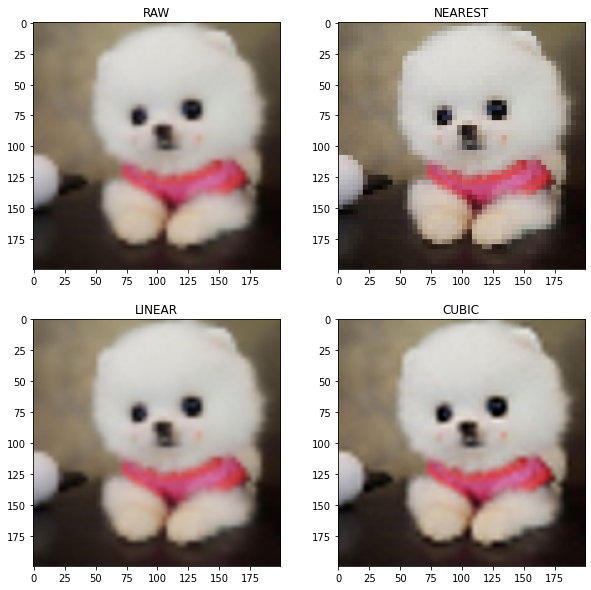

In [6]:
image = cv2.imread("./00_img/cv2.png")
image = cv2.resize(image, (50, 50))
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# 原始图片
new_image1 = cv2.resize(image, (200, 200))
ax1.set_title("RAW")

# 最近邻插值
new_image2 = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)
ax2.set_title("NEAREST")

# 双线性插值
new_image3 = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
ax3.set_title("LINEAR")

# 三次样条插值
new_image4 = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)
ax4.set_title("CUBIC")

ax1.imshow(new_image1[..., ::-1])
ax2.imshow(new_image2[..., ::-1])
ax3.imshow(new_image3[..., ::-1])
ax4.imshow(new_image4[..., ::-1])

### 拓展知识：什么是插值

![avatar](./00_img/cz1.png)
![avatar](./00_img/cz2.png)

![avatar](./00_img/zjl1.png)
![avatar](./00_img/xxcz.png)

双线性插$Bilinear$, -> 仿射、透视变换、$resize$等

----

### 图像仿射变换

- $cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])->dst$
    - src: 输入的目标图像
    - M ： 系数矩阵
    - dsize ：缩放尺度
    - flags：可以供选择的插值方式
    - borderMode: 可以指定边界处理方法，可以是复制边缘，填充常量等
- $cv2.getRotationMatrix2D(center, angle, scale)->retval$ 通过指定中心位置、角度和缩放系数，获得变换矩阵M
- $cv2.getAffineTransform(src, dst)$ 则是通过指定src，和dst的3个点对，获取得到变换矩阵M

array([[  0.8660254,   0.5      , -30.       ],
       [ -0.5      ,   0.8660254, -50.       ]])

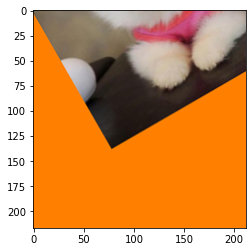

In [7]:
dog = cv2.imread("./00_img/cv2.png")
h, w, _ = dog.shape
# M = cv2.getRotationMatrix2D((w/2, h/2), 125, 0.6)   # 以图像的中心为旋转点，旋转125°， 缩放0.6倍
M = cv2.getRotationMatrix2D((0, 0), 30, 1)   # 以图像的中心为旋转点，旋转125°， 缩放0.6倍
M[0, 2] -= 30
M[1, 2] -= 50
new_dog = cv2.warpAffine(dog, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 128, 255))  # 填充边界是常量， 填充系数是橙色
plt.imshow(new_dog[...,::-1])
M

---

### 求解仿射变换矩阵M

$$
   \begin{Bmatrix}
      M00&M01&M02 \\
      M10&M11&M12 \\
      0&0 &1
    \end{Bmatrix}
                    \cdot
                \begin{Bmatrix}
      a_x&b_x&c_x \\
      a_y&b_y&c_y \\
      1&1&1
    \end{Bmatrix}
    =
    \begin{Bmatrix}
      a_{dsty}&b_{dsty}&c_{dsty} \\
      a_{dsty}&b_{dsty}&c_{dsty} \\
      1&1&1
    \end{Bmatrix}
$$


$$
 a_{dstx} = a_{x}m_{00}+a_{y}m_{01}+m_{02}
$$
$$
 a_{dsty} = a_{x}m_{10}+a_{y}m_{11}+m_{12}
$$
   
$$
 b_{dstx} = b_{x}m_{00}+b_{y}m_{01}+m_{02}
$$
$$
 b_{dsty} = b_{x}m_{10}+b_{y}m_{11}+m_{12}
$$
   
$$
 c_{dstx} = c_{x}m_{00}+c_{y}m_{01}+m_{02}
$$
$$
 c_{dsty} = c_{x}m_{10}+c_{y}m_{11}+m_{12}
$$

* 问题转换为矩阵乘法，提取出其中的系数部分

$$
\begin{gathered}
\begin{bmatrix} 
a_x & a_y & 1 & 0   & 0   & 0 \\ 
0   & 0   & 0 & a_x & a_y & 1 \\
b_x & b_y & 1 & 0   & 0   & 0 \\ 
0   & 0   & 0 & b_x & b_y & 1 \\
c_x & c_y & 1 & 0   & 0   & 0 \\ 
0   & 0   & 0 & c_x & c_y & 1 \\
\end{bmatrix}
\begin{bmatrix} 
m_{00} \\
m_{01} \\
m_{02} \\
m_{10} \\
m_{11} \\
m_{12} \\
\end{bmatrix}
=
\begin{bmatrix} 
a'_x \\
a'_y \\
b'_x \\
b'_y \\
c'_x \\
c'_y \\
\end{bmatrix}
\end{gathered}
$$

* 其中
$$A = \begin{bmatrix}
a_x & a_y & 1 & 0   & 0   & 0 \\
0   & 0   & 0 & a_x & a_y & 1 \\
b_x & b_y & 1 & 0   & 0   & 0 \\
0   & 0   & 0 & b_x & b_y & 1 \\
c_x & c_y & 1 & 0   & 0   & 0 \\
0   & 0   & 0 & c_x & c_y & 1 
\end{bmatrix}
\quad
M = 
\begin{bmatrix} 
m_{00} \\
m_{01} \\
m_{02} \\
m_{10} \\
m_{11} \\
m_{12} \\
\end{bmatrix}
\quad
B = \begin{bmatrix} 
a'_x \\
a'_y \\
b'_x \\
b'_y \\
c'_x \\
c'_y \\
\end{bmatrix}$$

* 定义最小二乘法
$$ argmin||AM - B||_{2}^2 $$
$$ M = (A^T A) ^{-1}A^TB $$

iron_man1 (579, 494, 3)


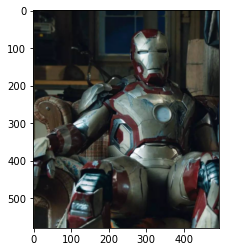

In [8]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

iron = cv2.imread("./00_img/iron_man1.png")
plt.imshow(iron[..., ::-1])   
print("iron_man1", iron.shape)

face (141, 98, 3)


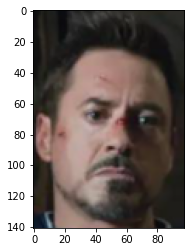

In [9]:
face = cv2.imread("./00_img/lb.png")
plt.imshow(face[..., ::-1])
print("face", face.shape)

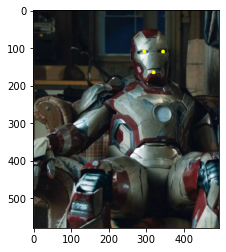

In [10]:
cv2.circle(iron, (295, 110), 5, (0, 255, 255), -1)  # 左眼
cv2.circle(iron, (345, 110), 5, (0, 255, 255), -1)  # 右眼
cv2.circle(iron, (320, 165), 5, (0, 255, 255), -1)  # 嘴
plt.imshow(iron[..., ::-1]) 

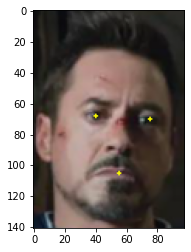

In [11]:
cv2.circle(face, (40, 68), 1, (0, 255, 255), -1)
cv2.circle(face, (75, 70), 1, (0, 255, 255), -1)
cv2.circle(face, (55, 105), 1, (0, 255, 255), -1)
plt.imshow(face[..., ::-1]) 

In [12]:
# 定义坐标点
B = [
    [295, 110],    
    [345, 110],    
    [320, 165]    
]

A = [
    [40, 68],    
    [75, 70],    
    [55, 105]     
]

(ax,   ay), (bx,   by), (cx,   cy) = A[0], A[1], A[2]
(dax, day), (dbx, dby), (dcx, dcy) = B[0], B[1], B[2]

A = np.array([
    [ax, ay, 1, 0,  0,  0],
    [0,  0,  0, ax, ay, 1],
    [bx, by, 1, 0,  0,  0],
    [0,  0,  0, bx, by, 1],
    [cx, cy, 1, 0,  0,  0],
    [0,  0,  0, cx, cy, 1]
])

B = np.array([
    dax,
    day,
    dbx,
    dby,
    dcx,
    dcy
]).T

M = np.linalg.inv(A.T @ A) @ A.T @ B
M = M.reshape(2, 3)
M

array([[ 1.42292490e+00,  9.88142292e-02,  2.31363636e+02],
       [-8.69565217e-02,  1.52173913e+00,  1.00000000e+01]])

将脸部位置仿射到钢铁侠的脸部位置

(579, 494, 3)

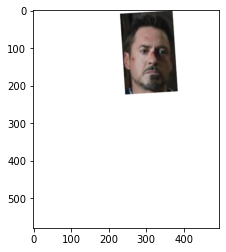

In [14]:
face = cv2.imread("./00_img/lb.png")
iron_man = cv2.imread("./00_img/iron_man1.png")

iron_man_height, iron_man_width = iron_man.shape[:2]
out_mask = cv2.warpAffine(face, M, (iron_man_width, iron_man_height), borderValue=(255, 255, 255))
plt.imshow(out_mask[..., ::-1])
iron_man.shape

In [17]:
def sigmoid(x):  # 定义sigmoid激活函数
    return 1 / (1 + np.exp(-x))

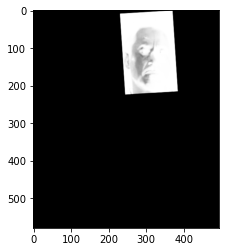

In [30]:
weight = np.abs(out_mask / 255 - 1)  # out_mask是0-255的值，归一化0-1以内后，1为白色。计算像素与白色的差异，正确来讲计算欧氏距离是对的
weight = np.fmax(weight[..., 0], weight[..., 1], weight[..., 2])  # 获取每个通道的最大值
weight = sigmoid((weight - 0.3) * 10)  # 对权重进行变换，使得它小于0.3的部分接近0，大于0.3部分增强权重
weight = weight.reshape(*weight.shape, 1)  # 图像需要变为3个维度， 参数展开
# plt.imshow(weight[..., 0], cmap="gray")  # 显示图像
plt.imshow(weight, cmap="gray")  # 显示图像
# print(weight.size, weight[...,0].size)
# print(weight.size, weight[...,0].shape)

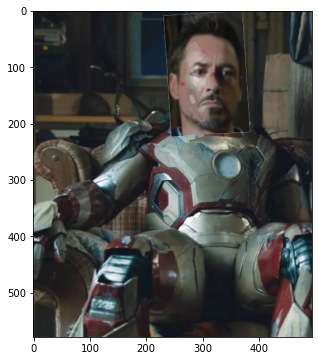

In [34]:
merge = (weight * out_mask + iron_man * (1 - weight)).astype(np.uint8)  # 合并face和iron图像，weight是face的权重
plt.figure(figsize=(8, 6))  # 画布显示弄大点
plt.imshow(merge[..., ::-1])  # 显示图像，因为通道问题，需要切片倒置通道维度

### warpaffine的使用场景：
- 图像预处理(平移居中，拉伸，长边等比居中缩放)
- 增广(随机旋转，平移，缩放，马赛克)
- 各类图像处理工作
- <font color=red>图像预处理，是加速优化的关键，懂了affine就可以使用GPU实现</font>

---

![avatar](./00_img/matrix.png)

### 图像平移

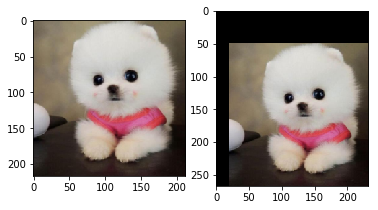

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./00_img/cv2.png")

img_info=img.shape
height=img_info[0]
width=img_info[1]

mat_translation=np.float32([[1,0,20],[0,1,50]])  #变换矩阵：设置平移变换所需的计算矩阵：2行3列
#[[1,0,20],[0,1,50]]   表示平移变换：其中+20表示x+20，+50表示y+50
dst=cv2.warpAffine(img,mat_translation,(width+20,height+50))  #仿射变换

plt.subplot(121)
plt.imshow(img[...,::-1])
plt.subplot(122)
plt.imshow(dst[...,::-1])

---

### 图像旋转

- $getRotationMatrix2D(center, angle, scale) -> retval$
- $center:$旋转中心 
- $angle:$ 旋转角度
- $scale:$缩放因子

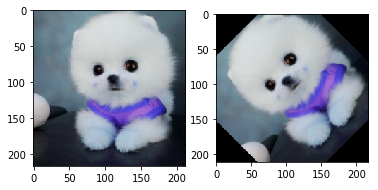

In [10]:
import cv2 
import matplotlib.pyplot as plt 
 
img = cv2.imread('./00_img/cv2.png') 
rows,cols = img.shape[:2] 
#第一个参数旋转中心，第二个参数旋转角度，第三个参数：缩放比例 
M = cv2.getRotationMatrix2D((cols/2,rows/2), 45, 1) 
#第三个参数：变换后的图像大小 
res = cv2.warpAffine(img,M,(rows,cols)) # 仿射变换
 
plt.subplot(121) 
plt.imshow(img) 
plt.subplot(122) 
plt.imshow(res)

---

### 图像透视变换

- $cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])->dst$
- $cv2.getPerspectiveTransform(src, dst[, solveMethod])->retval$ 通过指定src和dst的4个点对，实现透视变换

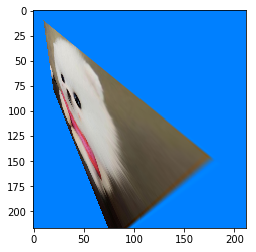

In [59]:
dog = cv2.imread("./00_img/cv2.png")
h, w, _ = dog.shape

src = np.array([
    [0, 0],
    [w, 0],
    [w, h],
    [0, h]
], dtype=np.float32)

dst = np.array([
    [10, 10],
    [180, 150],
    [80, 230],
    [20, 80]
], dtype=np.float32)

M = cv2.getPerspectiveTransform(src, dst)

new_dog = cv2.warpPerspective(dog, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 128, 0))
plt.imshow(new_dog[...,::-1])

---

### 图像几何变换的坐标计算

- M矩阵定义
    ```Python
    M = {
        M11, M12, M13,
        M21, M22, M23
    }
    ```
- image  ->  100 x 100
- dst    ->  50 x 80
- ix = 10
- iy = 5
- dx = ix * M11 + iy * M12 + M13
- dy = ix * M21 + iy * M22 + M23
- dst[dy, dx] = image[iy, ix]
- 我们可以写成矩阵乘法的形式:

$$
    \begin{Bmatrix}
      M11, M12, M13 \\
      M21, M22, M23
    \end{Bmatrix}
    \cdot
    \begin{Bmatrix}
      ix \\
      iy \\
      1
    \end{Bmatrix}
    =
    \begin{Bmatrix}
      dx \\
      dy
    \end{Bmatrix}
$$  

- 当我们没有旋转时，其实矩阵可以理解为：

$$
\begin{Bmatrix}
  xscale, 0, xoffset \\
  0, yscale, yoffset
\end{Bmatrix}
\cdot
\begin{Bmatrix}
  ix \\
  iy \\
  1
\end{Bmatrix}
=
\begin{Bmatrix}
  xscale * ix + 0 * iy      + 1 * xoffset \\
  0 * ix      + yscale * iy + 1 * yoffset
\end{Bmatrix}
$$

即：

$dx = ix * xscale + xoffset$

$dy = iy * yscale + yoffset$

---

### 图像平移

<img src="../00_img/warp_affine2.png"/>

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(500, 353, 3)

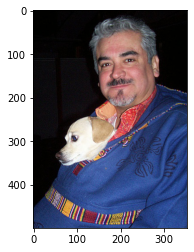

In [49]:
image = cv2.imread("./00_img/000001.jpg")
plt.imshow(image[..., ::-1])
image.shape

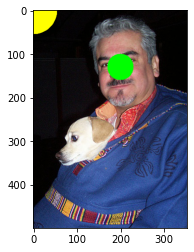

In [42]:
p0x = 200
p0y = 130
cv2.circle(image, (0, 0), 5, (0, 255, 255), -1)  # 绘制圆心位置
cv2.circle(image, (p0x, p0y), 30, (0, 255, 0), -1)  # 绘制 p0点
plt.imshow(image[..., ::-1])

创建一个新的图，大小是300, 400，然后将image上的点P0移动到新图像的中心上P1（50, 250）

In [43]:
new_w = 300
new_h = 400
p1x = 50
p1y = 250

当xscale = 1, yscale = 1，并没有平移

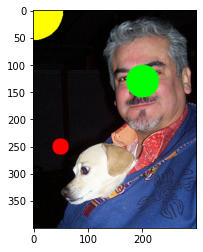

In [45]:
M = np.array([
    [1, 0, 0],
    [0, 1, 0]
], dtype=np.float32)
dst = cv2.warpAffine(image, M, (new_w, new_h))
cv2.circle(dst, (p1x, p1y), 15, (0, 0, 255), -1)  # 绘制p0点
plt.imshow(dst[..., ::-1])

增加平移P1.x, P1.y后

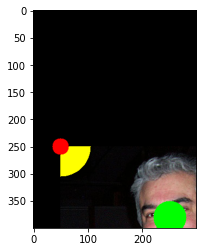

In [46]:
M = np.array([
    [1, 0, p1x],
    [0, 1, p1y]
], dtype=np.float32)
dst = cv2.warpAffine(image, M, (new_w, new_h))
cv2.circle(dst, (p1x, p1y), 15, (0, 0, 255), -1)
plt.imshow(dst[..., ::-1])

减去p0x，p0y后

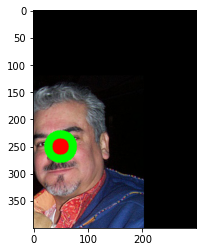

In [47]:
M = np.array([
    [1, 0, p1x - p0x],
    [0, 1, p1y - p0y]
], dtype=np.float32)
dst = cv2.warpAffine(image, M, (new_w, new_h))
cv2.circle(dst, (p1x, p1y), 15, (0, 0, 255), -1)
plt.imshow(dst[..., ::-1])

代码合并在一起

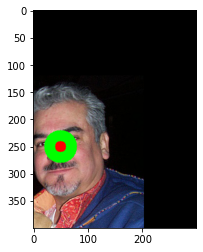

In [48]:
p0x = 200
p0y = 130

image = cv2.imread("./00_img/000001.jpg")
cv2.circle(image, (p0x, p0y), 30, (0, 255, 0), -1)

new_w = 300
new_h = 400
p1x = 50
p1y = 250

M = np.array([
    [1, 0, p1x - p0x],
    [0, 1, p1y - p0y]
], dtype=np.float32)

dst = cv2.warpAffine(image, M, (new_w, new_h))
cv2.circle(dst, (p1x, p1y), 10, (0, 0, 255), -1)
plt.imshow(dst[..., ::-1])

----

### 图像缩放

把image的中心移动到640x640大小的中心上，同时背景填充114

(500, 353, 3)

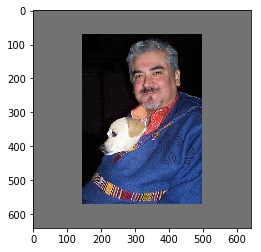

In [65]:
image = cv2.imread("./00_img/000001.jpg")
image_height, image_width = image.shape[:2]

image_point_x = image_width // 2
image_point_y = image_height // 2

new_width = 640
new_height = 640

dst_point_x = new_width // 2
dst_point_y = new_height // 2

M = np.array([
    [1, 0, dst_point_x - image_point_x],
    [0, 1, dst_point_y - image_point_y]
], dtype=np.float32)
dst = cv2.warpAffine(image, M, (new_width, new_height), borderValue=(114, 114, 114))
plt.imshow(dst[..., ::-1])
image.shape

### image中心移动到640x640中心上，同时边长等比缩放到640x640大小

- 因为是等比缩放，所以缩放系数xscale和yscale是一样的
- 长边拉伸，所以$scale = 640 / max(image_{width}, image_{height})$
    - 公式 $dx = ix * scale + xoffset$

In [63]:
scale = new_width / max(image_width, image_height)
scale

1.28

### 因为有scale的存在，加上scale后，按照之前的代码，计算为dx = ix * scale + (dst_point_x - image_point_x)
- 对于  ix(image单位) * scale  后得到的是 dst单位
- 对于  dst_point_x  是dst单位
- 对于  image_point_x  是image单位
- 因此，需要将image_point_x * scale，转换为dst单位，使其单位一致，结果为：dx = ix * scale + (dst_point_x - image_point_x * scale)
    - 因为ix是先经过了缩放，再相加，所以相加的单位必须与缩放后的ix单位一致

(640, 640, 3)

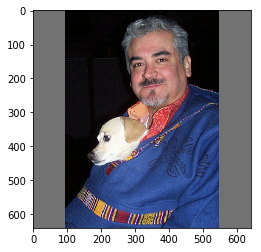

In [64]:
image = cv2.imread("./00_img/000001.jpg")
image_height, image_width = image.shape[:2]

image_point_x = image_width // 2
image_point_y = image_height // 2

new_width = 640
new_height = 640

dst_point_x = new_width // 2
dst_point_y = new_height // 2

M = np.array([
    [scale, 0, dst_point_x - image_point_x * scale],
    [0, scale, dst_point_y - image_point_y * scale]
], dtype=np.float32)
dst = cv2.warpAffine(image, M, (new_width, new_height), borderValue=(114, 114, 114))
plt.imshow(dst[..., ::-1])
dst.shape

### 简化后

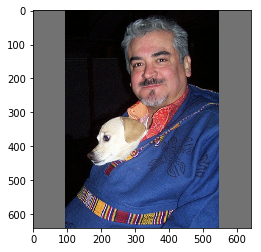

In [66]:
image = cv2.imread("./00_img/000001.jpg")
image_height, image_width = image.shape[:2]

new_width = 640
new_height = 640

scale = new_width / max(image_width, image_height)
M = np.array([
    [scale, 0, (new_width - image_width * scale) * 0.5],
    [0, scale, (new_height - image_height * scale) * 0.5]
], dtype=np.float32)
dst = cv2.warpAffine(image, M, (new_width, new_height), borderValue=(114, 114, 114))
plt.imshow(dst[..., ::-1])

对于dst宽高不相等时，希望等比居中缩放只需要修改scale的计算为min(new_width / image_width, new_height / image_height)

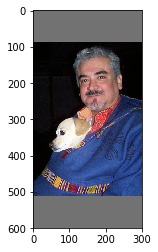

In [67]:
image = cv2.imread("./00_img/000001.jpg")
image_height, image_width = image.shape[:2]

new_width = 300
new_height = 600

scale = min(new_width / image_width, new_height / image_height)
M = np.array([
    [scale, 0, (new_width - image_width * scale) * 0.5],
    [0, scale, (new_height - image_height * scale) * 0.5]
], dtype=np.float32)
dst = cv2.warpAffine(image, M, (new_width, new_height), borderValue=(114, 114, 114))
plt.imshow(dst[..., ::-1])

---

### 矩阵旋转

使用getRotationMatrix2D() 获取得到M矩阵

In [51]:
cv2.getRotationMatrix2D?

Docstring:
getRotationMatrix2D(center, angle, scale) -> retval
.   @brief Calculates an affine matrix of 2D rotation.
.   
.   The function calculates the following matrix:
.   
.   \f[\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot \texttt{center.x} -  \beta \cdot \texttt{center.y} \\ - \beta &  \alpha &  \beta \cdot \texttt{center.x} + (1- \alpha )  \cdot \texttt{center.y} \end{bmatrix}\f]
.   
.   where
.   
.   \f[\begin{array}{l} \alpha =  \texttt{scale} \cdot \cos \texttt{angle} , \\ \beta =  \texttt{scale} \cdot \sin \texttt{angle} \end{array}\f]
.   
.   The transformation maps the rotation center to itself. If this is not the target, adjust the shift.
.   
.   @param center Center of the rotation in the source image.
.   @param angle Rotation angle in degrees. Positive values mean counter-clockwise rotation (the
.   coordinate origin is assumed to be the top-left corner).
.   @param scale Isotropic scale factor.
.   
.   @sa  getAffineTransform, warpAffine, transform
Typ

In [71]:
M = cv2.getRotationMatrix2D((100, 100), 30, 0.8)
M

array([[ 0.69282032,  0.4       , -9.2820323 ],
       [-0.4       ,  0.69282032, 70.7179677 ]])

* 旋转中心在旋转前和旋转后是同一个位置

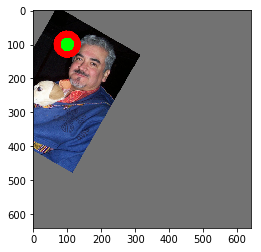

In [72]:
image = cv2.imread("./00_img/000001.jpg")
M = cv2.getRotationMatrix2D((100, 100), -30, 0.8)  # 在(100, 100)处对图像进行旋转30°
cv2.circle(image, (100, 100), 50, (0, 0, 255), -1)  # 绘制旋转前红色点
dst = cv2.warpAffine(image, M, (640, 640), borderValue=(114, 114, 114))
cv2.circle(dst, (100, 100), 20, (0, 255, 0), -1)  # 绘制旋转后绿色点
plt.imshow(dst[..., ::-1])

修改偏移量，使其旋转中心移动到目标图的中心上去

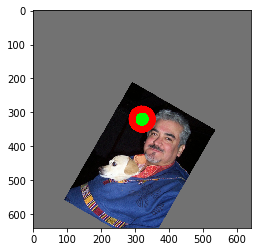

In [74]:
image = cv2.imread("./00_img/000001.jpg")
M = cv2.getRotationMatrix2D((100, 100), -30, 0.8)
M[0, 2] = M[0, 2] - 100 + 640 * 0.5  # 将目标图移动到中心位置
M[1, 2] = M[1, 2] - 100 + 640 * 0.5
cv2.circle(image, (100, 100), 50, (0, 0, 255), -1)
dst = cv2.warpAffine(image, M, (640, 640), borderValue=(114, 114, 114))
cv2.circle(dst, (320, 320), 20, (0, 255, 0), -1)
plt.imshow(dst[..., ::-1])

### 对于旋转问题的，考虑角度$\theta$和x y r之间的关系

<img src="./00_img/img1.png"/>

### 考虑点A基于原点O旋转$\theta$角后得到点B

<img src="./00_img/img2.png"/>

### 公式：
- $cos(a - b) = cos(a)cos(b) + sin(a)sin(b)$
- $sin(a - b) = sin(a)cos(b) - cos(a)sin(b)$

In [79]:
a = np.pi * 0.8
b = np.pi * 0.5

In [80]:
cos = np.cos
sin = np.sin

In [81]:
cos(a - b), cos(a) * cos(b) + sin(a) * sin(b)

(0.5877852522924731, 0.5877852522924732)

In [82]:
sin(a - b), sin(a) * cos(b) - cos(a) * sin(b)

(0.8090169943749475, 0.8090169943749473)

### 计算得B.x = A.x * cos$\theta$ + A.y * sin$\theta$ + 0

<img src="./00_img/img4.png" />

### 计算得B.y = -A.x * sin$\theta$ + A.y * cos$\theta$ + 0

<img src="./00_img/img5.png"/>

### 因此对于旋转$\theta$角度的M矩阵定义为：
$$ 
M = 
\begin{Bmatrix}
cos\theta & sin\theta & 0 \\
-sin\theta & cos\theta & 0
\end{Bmatrix}
$$

* 测试一下：

In [84]:
# 旋转中心为原点0，角度为theta，scale没有时
theta = 30  # 角度值
M = cv2.getRotationMatrix2D((0, 0), theta, 1)
M

array([[ 0.8660254,  0.5      ,  0.       ],
       [-0.5      ,  0.8660254,  0.       ]])

In [85]:
rad = theta / 180 * np.pi  # 弧度值
M = np.array([
    [np.cos(rad), np.sin(rad), 0],
    [-np.sin(rad), np.cos(rad), 0]
])
M

array([[ 0.8660254,  0.5      ,  0.       ],
       [-0.5      ,  0.8660254,  0.       ]])

### 考虑A点，根据特定旋转中心P，旋转$\theta$度得到B
- 先用A减去P得到A相对于P原点的坐标，然后进行旋转。转完后加P恢复到O为原点的坐标系

<img src="./00_img/img6.png"/>

## 我们得到B点的计算方式
### B.x = (A.x - P.x) * cos$\theta$ + (A.y - P.y) * sin$\theta$ + P.x
### B.y = -(A.x - P.x) * sin$\theta$ + (A.y - P.y) * cos$\theta$ + P.y

## 展开后，即可得到
### B.x = A.x * cos$\theta$ + A.y * sin$\theta$ - P.x * cos$\theta$ - P.y * sin$\theta$ + P.x
### B.y = -A.x * sin$\theta$ + A.y * cos$\theta$ + P.x * sin$\theta$ - P.y * cos$\theta$ + P.y
<br/>

## 转换一下后：
### B.x = A.x * cos$\theta$ + A.y * sin$\theta$ + P.x * (1 - cos$\theta$) - P.y * sin$\theta$
### B.y = -A.x * sin$\theta$ + A.y * cos$\theta$ + P.x * sin$\theta$ + P.y * (1 - cos$\theta$)

## 因此，对于旋转中心为P点时，旋转角度为$\theta$时，其M矩阵定义为：
$$ 
M = 
\begin{Bmatrix}
\cos\theta & \sin\theta & P_x  (1 - \cos\theta) - P_y  \sin\theta \\
-\sin\theta & \cos\theta & P_x  \sin\theta + P_y (1 - \cos\theta)
\end{Bmatrix}
$$

* 测试一下

In [86]:
# 旋转中心为原点0，角度为theta，scale没有时
theta = 30
Px = 50
Py = 80
M = cv2.getRotationMatrix2D((Px, Py), theta, 1)
M

array([[  0.8660254 ,   0.5       , -33.30127019],
       [ -0.5       ,   0.8660254 ,  35.7179677 ]])

In [87]:
rad = theta / 180 * np.pi
cos_t = np.cos(rad)
sin_t = np.sin(rad)
M = np.array([
    [cos_t, sin_t, Px * (1 - cos_t) - Py * sin_t],
    [-sin_t, cos_t, Px * sin_t + Py * (1 - cos_t)]
])
M

array([[  0.8660254 ,   0.5       , -33.30127019],
       [ -0.5       ,   0.8660254 ,  35.7179677 ]])

### 考虑基于P为中心旋转$\theta$度得到B，并进行缩放s倍得到C时

<img src="./00_img/img8.png"/>

## 因为缩放是发生在P坐标系原点上的，由此得到：
### $B^{P}_{x} = (A_x - P_x) cos\theta + (A_y - P_y) sin\theta$
### $C^{P}_{x} = B^{P}_{x} s$
### $C_x = C^{P}_{x} + P_x$

## 同理得到y是：
### $B^{P}_{y} = -(A_x - P_x) sin\theta + (A_y - P_y) cos\theta$
### $C^{P}_{y} = B^{P}_{y} s$
### $C_{y} = C^{P}_{y} + P_y$

## 结合起来即：
### 设$$\alpha = \cos\theta \cdot s, \beta = \sin\theta \cdot s$$
### 则x的计算为：
### $$\begin{align}
C_x & = [(A_x - P_x) \cos\theta + (A_y - P_y) \sin\theta] \cdot s + P_x \\
    & = A_x \cos\theta \cdot s + A_y \sin\theta \cdot s - P_x \cos\theta \cdot s - P_y \sin\theta \cdot s + P_x \\
    & = A_x \cdot \alpha + A_y \cdot \beta + P_x (1 - \alpha) - P_y \cdot \beta \\
\end{align}
$$

### 同理y的计算为
### $$\begin{align}
C_y & = [-(A_x - P_x) \sin\theta + (A_y - P_y) \cos\theta] \cdot s + P_y \\
    & = -A_x \sin\theta \cdot s + A_y \cos\theta \cdot s + P_x \sin\theta \cdot s - P_y \cos\theta \cdot s + P_y\\
    & = -A_x \cdot \beta + A_y \cdot \alpha + P_x \cdot \beta + P_y(1 - \alpha) \\
\end{align}
$$

### 则基于P为中心旋转$\theta$度，并进行s倍缩放时，M矩阵的定义为：

$$ 
M = 
\begin{Bmatrix}
\alpha & \beta & P_x (1 - \alpha) - P_y \beta \\
-\beta & \alpha & P_x  \beta + P_y (1 - \alpha)
\end{Bmatrix} \\
其中 𝛼=cos𝜃⋅𝑠,𝛽=sin𝜃⋅𝑠
$$

### 测试一下：

In [52]:
# 旋转中心为原点0，角度为theta，缩放系数为s时
theta = 30
s = 1.5
Px = 50
Py = 80
M = cv2.getRotationMatrix2D((Px, Py), theta, s)
M

array([[  1.29903811,   0.75      , -74.95190528],
       [ -0.75      ,   1.29903811,  13.57695155]])

In [27]:
rad = theta / 180 * np.pi
alpha = np.cos(rad) * s
beta = np.sin(rad) * s
M = np.array([
    [alpha, beta, Px * (1 - alpha) - Py * beta],
    [-beta, alpha, Px * beta + Py * (1 - alpha)]
])
M

array([[  1.29903811,   0.75      , -74.95190528],
       [ -0.75      ,   1.29903811,  13.57695155]])

* OpenCV源代码：https://github.com/opencv/opencv/blob/624d532000d726734637e6d51c8e40785f45b46b/modules/imgproc/src/imgwarp.cpp#L3238

### 考虑逆变换
#### 从dx = ix * M00 + iy * M01 + M02，变为ix = dx * N00 + dy * N01 + N02
#### 从dy = ix * M10 + iy * M11 + M12，变为iy = dx * N10 + dy * N11 + N12
#### 通过已知目标坐标dx, dy，和矩阵N，计算输入图像坐标ix, iy
#### $$
  \begin{Bmatrix}
  M_{00} & M_{01} & M_{02} \\
  M_{10} & M_{11} & M_{12} \\
  0 & 0 & 1
  \end{Bmatrix}
  \cdot
  \begin{Bmatrix}
  ix \\
  iy \\
  1
  \end{Bmatrix}
  =
  \begin{Bmatrix}
  dx \\
  dy \\
  1
  \end{Bmatrix}
$$
## 反过来，需要计算N矩阵：
## $$
  \begin{Bmatrix}
  N_{00} & N_{01} & N_{02} \\
  N_{10} & N_{11} & N_{12} \\
  0 & 0 & 1
  \end{Bmatrix}
  \cdot
  \begin{Bmatrix}
  dx \\
  dy \\
  1
  \end{Bmatrix}
  =
  \begin{Bmatrix}
  ix \\
  iy \\
  1
  \end{Bmatrix}
$$

## 在这里
$$
设：
M = \begin{Bmatrix}
  M_{00} & M_{01} & M_{02} \\
  M_{10} & M_{11} & M_{12} \\
  0 & 0 & 1
  \end{Bmatrix},
I =
  \begin{Bmatrix}
  ix \\
  iy \\
  1
  \end{Bmatrix},
D = 
  \begin{Bmatrix}
  dx \\
  dy \\
  1
  \end{Bmatrix}
$$

$$
则有：M \cdot I = D \\
转换为： M^{-1} \cdot D = I \\
同时有： N \cdot D = I \\
因此：   N = M^{-1} 
$$

## 结论为：如果需要逆变换矩阵N，直接对矩阵求逆矩阵即可

## 测试一下：
- 可以使用cv2.invertAffineTransform，直接计算仿射变换的逆矩阵
- 也可以使用标准的通用逆矩阵计算，但是invertAffineTransform更加高效
- https://github.com/opencv/opencv/blob/624d532000d726734637e6d51c8e40785f45b46b/modules/imgproc/src/imgwarp.cpp#L3349

In [109]:
M = cv2.getRotationMatrix2D((0, 0), -30, 0.8)
cv2.invertAffineTransform(M)

array([[ 1.08253175,  0.625     , -0.        ],
       [-0.625     ,  1.08253175,  0.        ]])

In [110]:
N = np.eye(3)
N[:2] = M
np.matrix(N).I

matrix([[ 1.08253175,  0.625     ,  0.        ],
        [-0.625     ,  1.08253175,  0.        ],
        [ 0.        ,  0.        ,  1.        ]])

---

### 线性插值问题

In [191]:
p0_value = 10
p1_value = 15
position = 0.3

p0_weight = 1 - position
p1_weight = position
value = p0_value * p0_weight + p1_value * p1_weight
value

11.5

In [190]:
np.interp(0.3, xp=[0, 1], fp=[10, 15])

11.5

# 11.考虑双线性插值问题
<img src="./00_img/bilinear.png"/>

* 这里考虑的是方形哈，不是异形，所以p0的x与p2的x一致，p2的y与p3的y一致

In [53]:
p0 = 10, 5,   8
p1 = 20, 5,   15
p2 = 10, 15,  1
p3 = 20, 15,  5
a = 13, 8
a = 14, 12

In [54]:
p0_weight = (p1[0] - a[0]) / (p1[0] - p0[0]) * (p2[1] - a[1]) / (p2[1] - p0[1])
p0_weight

0.18

In [55]:
p1_weight = (a[0] - p0[0]) / (p1[0] - p0[0]) * (p3[1] - a[1]) / (p3[1] - p1[1])
p1_weight

0.12000000000000002

In [56]:
p2_weight = (p3[0] - a[0]) / (p3[0] - p2[0]) * (a[1] - p0[1]) / (p2[1] - p0[1])
p2_weight

0.42000000000000004

In [57]:
p3_weight = (a[0] - p2[0]) / (p3[0] - p2[0]) * (a[1] - p1[1]) / (p3[1] - p1[1])
p3_weight

0.28

In [58]:
total = p0_weight + p1_weight + p2_weight + p3_weight
total

1.0

In [59]:
value = p0_weight * p0[2] + p1_weight * p1[2] + p2_weight * p2[2] + p3_weight * p3[2]
value

5.0600000000000005

## 如果考虑的是4个邻近像素，两个点的间隔为1，那么除法就不用考虑了

<img src="./00_img/pixel.png"/>

In [88]:
p0 = 0, 0,   8
p1 = 1, 0,   15
p2 = 0, 1,   1
p3 = 1, 1,   5
a = 0.3, 0.3

In [89]:
p0_weight = (p1[0] - a[0]) * (p2[1] - a[1])
p0_weight

0.48999999999999994

In [90]:
p1_weight = (a[0] - p0[0]) * (p3[1] - a[1])
p1_weight

0.21

In [91]:
p2_weight = (p3[0] - a[0]) * (a[1] - p0[1])
p2_weight

0.21

In [92]:
p3_weight = (a[0] - p2[0]) * (a[1] - p1[1])
p3_weight

0.09

In [93]:
total = p0_weight + p1_weight + p2_weight + p3_weight
total

0.9999999999999999

In [94]:
value = p0_weight * p0[2] + p1_weight * p1[2] + p2_weight * p2[2] + p3_weight * p3[2]
value

7.7299999999999995

### 实现双线性插值的warpaffine

In [95]:
M = cv2.getRotationMatrix2D(center=(150, 100), angle=35, scale=1.5)
M

array([[   1.22872807,    0.86036465, -120.34567542],
       [  -0.86036465,    1.22872807,  106.18189154]])

In [101]:
image = cv2.imread("./00_img/000001.jpg")
image = cv2.resize(image, (150, 200))

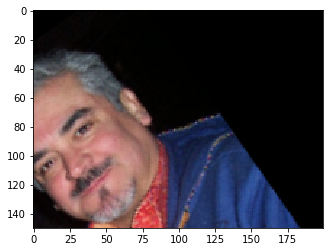

In [102]:
new_width = 200
new_height = 150
dst = cv2.warpAffine(image, M, (new_width, new_height))
plt.imshow(dst[..., ::-1])

### 自己的实现版本

<img src="./00_img/bilinear2.png"/>

In [107]:
dst = np.zeros((new_height, new_width, 3), dtype=np.uint8)
invert_M = cv2.invertAffineTransform(M)
image_height, image_width = image.shape[:2]

for dx in range(new_width):
    for dy in range(new_height):
        
        ix, iy = invert_M @ np.array([dx, dy, 1]).reshape(3, 1)
        
        # 开始双线性插值，获取ix, iy最近的4个像素并插值
        ix_low = int(np.floor(ix))  # 向下取整
        ix_high = int(np.ceil(ix))  # 向上取整
        
        iy_low = int(np.floor(iy))
        iy_high = int(np.ceil(iy))
        
        # p0    p1
        #
        # p2    p3
        weights = [
            (ix_high - ix) * (iy_high - iy),   # p0_weight
            (ix - ix_low) * (iy_high - iy),    # p1_weight
            (ix_high - ix) * (iy - iy_low),    # p2_weight
            (ix - ix_low) * (iy - iy_low)      # p3_weight
        ]
        
        position = [
            [ix_low, iy_low],  #p0
            [ix_high, iy_low], #p1
            [ix_low, iy_high], #p2
            [ix_high, iy_high] #p3
        ]
        
        value = np.array([0, 0, 0], dtype=np.float32)
        for (x, y), weight in zip(position, weights):
            
            # 判断是否越界
            if x >= 0 and x < image_width and y >= 0 and y < image_height:
                # 该点存在
                value += image[y, x] * weight
        dst[dy, dx] = value.clip(0, 255)

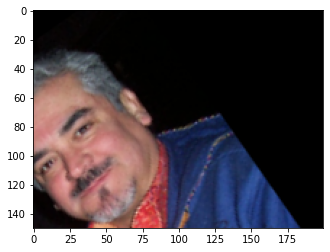

In [205]:
plt.imshow(dst[..., ::-1])